In [17]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
labels = pd.read_csv("../handwritten_dataset/labels.csv")

In [3]:
labels.head()

,image,label
0,images/img001-001.png,0
1,images/img001-002.png,0
2,images/img001-003.png,0
3,images/img001-004.png,0
4,images/img001-005.png,0


In [40]:
img = cv2.imread('../handwritten_dataset/images/img001-001.png')

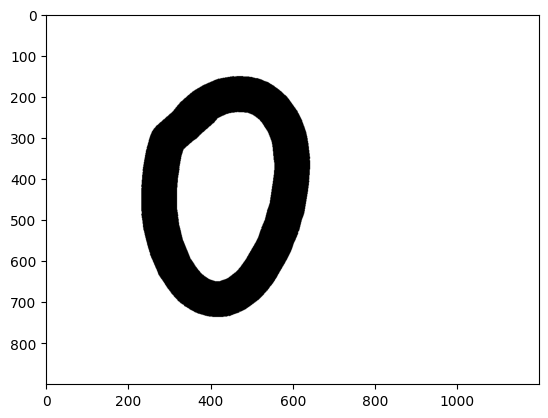

In [41]:
plt.imshow(img)
plt.show()

In [14]:
# convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# invert gray image
gray = 255 - gray

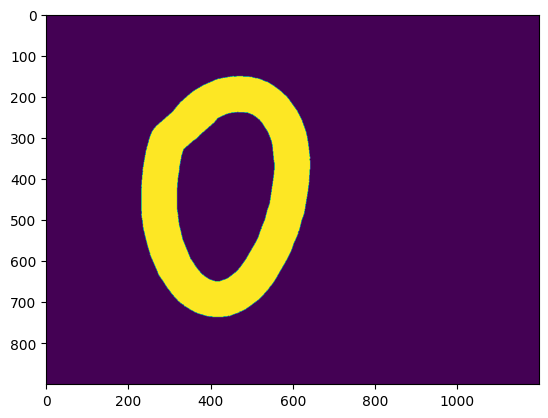

In [20]:
plt.imshow(gray)
plt.show()

In [15]:
thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY)[1]

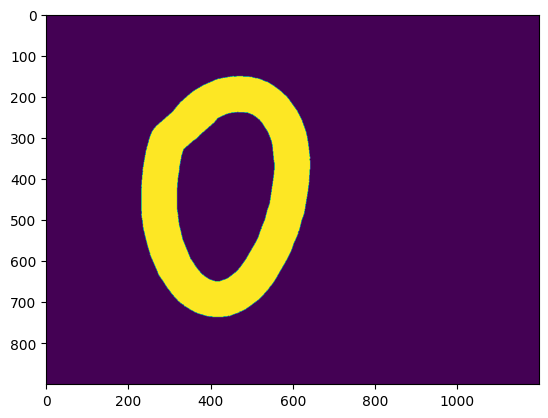

In [22]:
plt.imshow(thresh)
plt.show()

In [23]:
# apply close and open morphology to fill tiny black and white holes and save as mask
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

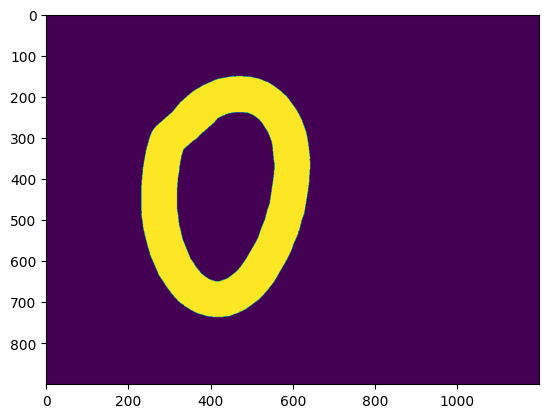

In [25]:
plt.imshow(mask)
plt.show()

In [26]:
# get contours (presumably just one around the nonzero pixels) 
contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
cntr = contours[0]
x,y,w,h = cv2.boundingRect(cntr)

In [32]:
# make background transparent by placing the mask into the alpha channel
new_img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
new_img[:, :, 3] = mask

In [34]:
# then crop it to bounding rectangle
crop = new_img[y:y+h, x:x+w]

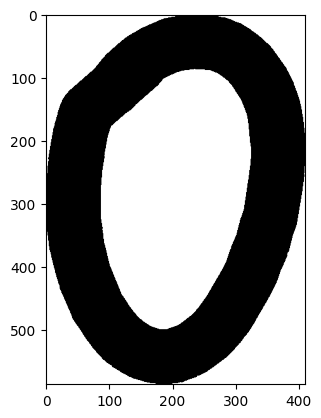

In [39]:
plt.imshow(crop)